# ACTIVIDAD 1: EJERCICIO DE CENTRALIDAD

**Redes Sociales, Colaboración en Red**  
Grafo Juego de Tronos  
  
**Autores:**  
Martín Salinas Antón - martin.salinas@estudiante.uam.es  
Belén Vivas García - belen.vivas@estudiante.uam.es

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice

En esta actividad analizaremos un grafo de la serie Juego de Tronos, el cual representa la red social de sus personajes.  
Primero analizaremos su conexión y la distribución de los caminos más cortos y, seguidamente, calcularemos su centralidad utilizando diferentes medidas para ver cuáles son los personajes más importantes de la serie.

## Lectura de Datos

Leemos el grafo con NetworkX y vemos la estructura que tiene.

In [2]:
G = nx.read_graphml('data/juegoDtronos.graphml')

In [3]:
# Vemos una muestra de los nodos que tiene y sus atributos
for node in islice(G.nodes(data=True), 0, 10):
    print(node)

('Addam-Marbrand', {'label': 'Addam-Marbrand', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 548.192, 'y': -1542.1415})
('Brynden-Tully', {'label': 'Brynden-Tully', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -867.2599, 'y': -1118.1295})
('Cersei-Lannister', {'label': 'Cersei-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 725.1648, 'y': -1192.3834})
('Gyles-Rosby', {'label': 'Gyles-Rosby', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1218.8805, 'y': -862.3968})
('Jaime-Lannister', {'label': 'Jaime-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -144.7509, 'y': -1121.8662})
('Jalabhar-Xho', {'label': 'Jalabhar-Xho', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1844.3105, 'y': -2152.5952})
('Joffrey-Baratheon', {'label': 'Joffrey-Baratheon', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 339.98248, 'y': -498.40387})
('Kevan-Lannister', {'label': 'Kevan-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 119.34762, 'y': -637.41815})
('Lyle-Crakehall', {'label': 'Lyle-Crakehall', 'si

In [4]:
# Vemos una muestra de como son las conexiones entre los nodos
for edge in islice(G.edges(data=True), 0, 10):
    print(edge)

('Addam-Marbrand', 'Brynden-Tully', {'weight': 3.0, 'id': '0'})
('Addam-Marbrand', 'Cersei-Lannister', {'weight': 3.0, 'id': '1'})
('Addam-Marbrand', 'Gyles-Rosby', {'weight': 3.0, 'id': '2'})
('Addam-Marbrand', 'Jaime-Lannister', {'weight': 14.0, 'id': '3'})
('Addam-Marbrand', 'Jalabhar-Xho', {'weight': 3.0, 'id': '4'})
('Addam-Marbrand', 'Joffrey-Baratheon', {'weight': 3.0, 'id': '5'})
('Addam-Marbrand', 'Kevan-Lannister', {'weight': 3.0, 'id': '6'})
('Addam-Marbrand', 'Lyle-Crakehall', {'weight': 4.0, 'id': '7'})
('Addam-Marbrand', 'Oberyn-Martell', {'weight': 3.0, 'id': '8'})
('Addam-Marbrand', 'Tyrion-Lannister', {'weight': 7.0, 'id': '9'})


## Análisis del Grafo

### Conexión

Para determinar la conexión del grafo, primero tenemos que saber si es dirigido o no dirigido.  
Mirando el fichero, podemos ver un atributo al principio: `<graph edgedefault="directed">`, que nos indica que es dirigido, pero usaremos la librería de NetworkX para confirmarlo.

In [5]:
# Vemos si el grafo es dirigido
if nx.is_directed(G):
    print("El grafo es dirigido")
else:
    print("El grafo no es dirigido")

El grafo es dirigido


El grafo es **dirigido**, por lo que, para determinar su conexión, tendremos que buscar componentes fuertemente conectadas (strongly connected components). Primero comprobamos si todo el grafo está fuertemente conectado y, si no lo estuviera, buscaríamos la componente fuertemente conectada más grande.

In [6]:
# Vemos si el grafo esta fuertemente conectado
if nx.is_strongly_connected(G):
    print("El grafo está fuertemente conectado")
else:
    print("El grafo no está fuertemente conectado")

El grafo está fuertemente conectado


El grafo es **conectado**, por lo que trabajaremos directamente sobre él.

### Caminos más Cortos y Diámetro del Grafo

En primer lugar, obtenemos los caminos más cortos y el diámetro del grafo.

In [7]:
# Esta función devuelve la media de caminos de un grafo dirigido
def media_caminos_dirigido(Graph):
    suma = 0
    N = len(Graph.nodes)
    for u in nx.nodes(Graph):
        for v in nx.nodes(Graph):
            if u != v:
                suma += nx.shortest_path_length(Graph, u, v)
    return suma / (N * (N-1))

def diametro(Graph):
    return nx.diameter(Graph)

In [8]:
# Calculamos la media de caminos más cortos y el diámetro
long_media_grafo = media_caminos_dirigido(G)
print(f"Longitud media de caminos entre 2 nodos del grafo (h): {long_media_grafo}")
print(f"Diámetro del grafo (máximo camino más corto): {diametro(G)}")

Longitud media de caminos entre 2 nodos del grafo (h): 3.416225783003066
Diámetro del grafo (máximo camino más corto): 9


A continuación, graficamos los resultados.

In [9]:
# Esta función grafica la dostribución de caminos más cortos
def distribucion_caminos_dirigido(Graph):
    caminos = []
    for u in nx.nodes(Graph):
        for v in nx.nodes(Graph):
            if u != v:
                caminos.append(nx.shortest_path_length(Graph, u, v))
    plt.hist(caminos)
    plt.xlabel('Longitud del camino más corto')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de caminos más cortos en el grafo dirigido')
    plt.show()

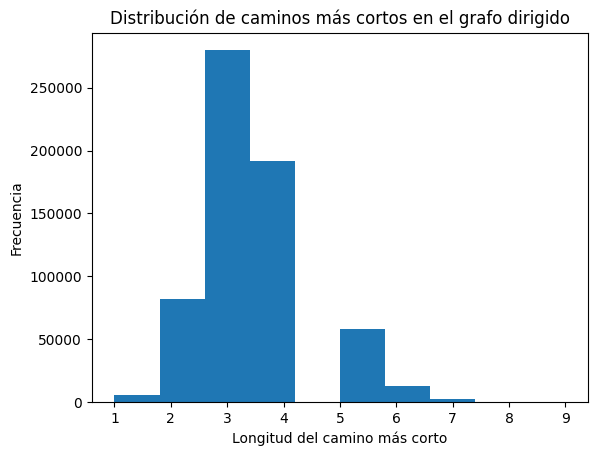

In [10]:
# Obtenemos gráfica
distribucion_caminos_dirigido(G)

### Otras Características Generales de la Red Social

### Centralidad de Cada Nodo

El cálculo de la centralidad en el grafo nos permitirá descubrir cuáles son los personajes más importantes, o con mayor influencia dentro de la serie. Lo realizaremos con diferentes medidas de centralidad, calculándolas para cada nodo.  
NetworkX nos ofrece una librería de funciones que realizan estos cálculos sobre cada uno de los nodos del grafo indicado.  

- **Centralidad de Grado**: esta medida se basa en el número de enlaces que un nodo tiene con otros. Cuantos más enlaces tenga un nodo, mayor influencia tendrá.  

- **Centralidad de Vector Propio**: esta medida no sólo tiene en cuenta el número de enlaces del nodo, sino también la importancia de los enlaces. Se considera que un nodo es más importante si está conectado a otros nodos importantes.  
  
- **Centralidad de Intermediación**: se basa en la capacidad de un nodo para controlar el flujo entre determinados nodos del grafo (ser intermediario). Es decir, cuanta más centralidad de intermediación tenga un nodo, significa que es un "puente" más importante entre otros nodos.  

- **Centralidad de Cercanía**: indica cómo de cerca está un nodo del resto de nodos. Los nodos con mayor centralidad de cercanía tienen una distancia media más corta al resto. Estima cómo de rápido se expandiría una información a través de un nodo a otros nodos.

- **Centralidad de Katz**: es similar a la centralidad de vector propio, pero esta medida otorga más peso a los caminos más cortos, y reduce el peso de los más largos. De esta forma, los nodos que estén en caminos más cortos entre otros nodos importantes tendrán una mayor centralidad de este tipo.

- **Centralidad de PageRank**: la importancia de un nodo se basa en si este es referenciado por otros nodos importantes. El valor de cada nodo es un PageRank, el cual indica la probabilidad de que un nodo en el grafo llegue a ese nodo.




In [11]:
# Genera el grafico de distribucion para las medidas de centralidad
def distribucion_centralidad(dict, label):

    print("\nDistribución de la centralidad de {}:".format(label))

    plt.hist(list(dict.values()))

    plt.title("Distribución de la centralidad de {}".format(label))
    plt.xlabel("Centralidad de {}".format(label))
    plt.ylabel("Número de nodos")

    plt.show()


# Devuelve cada medida de centralidad ordenada de mayor a menor, cogiendo
# solo los 10 primeros
def top_10(dict, label):

    print("\nTop 10 personajes con mayor centralidad de {}:\n".format(label))

    # Ordenamos el diccionario y obtenemos los 10 primeros
    sorted_list = sorted(dict.items(), key=lambda x: x[1], reverse=True)[0:10]

    # Imprimimos el resultado en formato de tabla
    print("{:<5} {:<20} {:<10}".format('Top', 'Nombre', 'Centralidad'))

    i = 1
    for e in sorted_list:
        name = e[0]
        centrality = e[1]

        print("{:<5} {:<20} {:<10}".format(i, name, centrality))
        i = i + 1


# Caculamos para cada nodo las medidas de centralidad, indicando los 10 personajes
# con mayor importancia para cada una de ellas y la distribucion
def calcular_centralidades(Graph):

    # Calculamos las diferentes medidas de centralidad
    centralidad_de_grado = nx.degree_centrality(Graph)
    centralidad_de_vector_propio = nx.eigenvector_centrality(Graph)
    centralidad_de_intermediacion = nx.betweenness_centrality(Graph)
    centralidad_de_cercania = nx.closeness_centrality(Graph)
    centralidad_de_katz = nx.katz_centrality_numpy(Graph)
    centralidad_de_pagerank = nx.pagerank(Graph)


    # 10 personajes con mayor centralidad de grado
    top_10(centralidad_de_grado, "grado")
    distribucion_centralidad(centralidad_de_grado, "grado")

    # 10 personajes con mayor centralidad de vector propio
    top_10(centralidad_de_vector_propio, "vector propio")
    distribucion_centralidad(centralidad_de_vector_propio, "vector propio")

    # 10 personajes con mayor centralidad de intermediacion
    top_10(centralidad_de_intermediacion, "intermediación")
    distribucion_centralidad(centralidad_de_intermediacion, "intermediación")

    # 10 personajes con mayor centralidad de cercania
    top_10(centralidad_de_cercania, "cercanía")
    distribucion_centralidad(centralidad_de_cercania, "cercanía")

    # 10 personajes con mayor centralidad de Katz
    top_10(centralidad_de_katz, "Katz")
    distribucion_centralidad(centralidad_de_katz, "Katz")

    # 10 personajes con mayor centralidad de PageRank
    top_10(centralidad_de_pagerank, "PageRank")
    distribucion_centralidad(centralidad_de_pagerank, "PageRank")



Top 10 personajes con mayor centralidad de grado:

Top   Nombre               Centralidad
1     Tyrion-Lannister     0.3069182389937107
2     Jon-Snow             0.28679245283018867
3     Jaime-Lannister      0.2540880503144654
4     Cersei-Lannister     0.2440251572327044
5     Stannis-Baratheon    0.22389937106918237
6     Arya-Stark           0.2113207547169811
7     Catelyn-Stark        0.18867924528301885
8     Sansa-Stark          0.18867924528301885
9     Robb-Stark           0.1861635220125786
10    Eddard-Stark         0.1861635220125786

Distribución de la centralidad de grado:


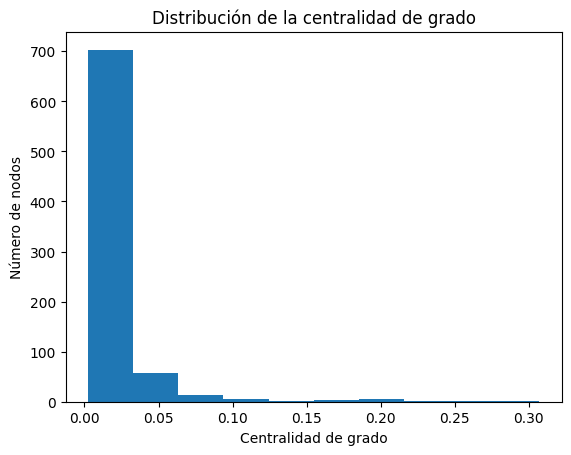


Top 10 personajes con mayor centralidad de vector propio:

Top   Nombre               Centralidad
1     Tyrion-Lannister     0.2515583636908199
2     Cersei-Lannister     0.2357712102434476
3     Jaime-Lannister      0.22633850166044062
4     Joffrey-Baratheon    0.21437627019042796
5     Sansa-Stark          0.20584216286964788
6     Robert-Baratheon     0.1943750405094227
7     Eddard-Stark         0.19165954952371522
8     Stannis-Baratheon    0.18208517838192118
9     Catelyn-Stark        0.17588556613451867
10    Robb-Stark           0.1731962718578243

Distribución de la centralidad de vector propio:


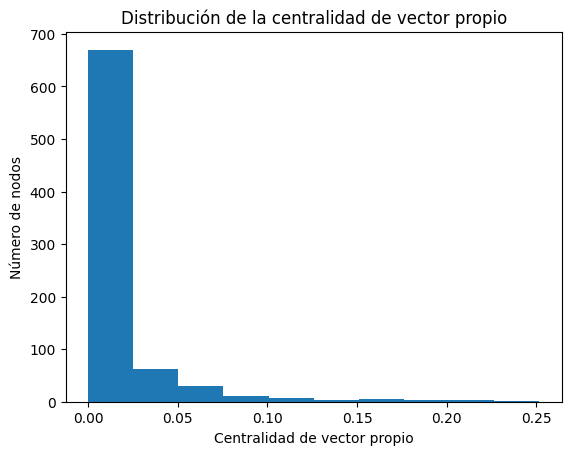


Top 10 personajes con mayor centralidad de intermediación:

Top   Nombre               Centralidad
1     Jon-Snow             0.19211961968354493
2     Tyrion-Lannister     0.16219109611159863
3     Daenerys-Targaryen   0.11841801916269211
4     Theon-Greyjoy        0.11128331813470231
5     Stannis-Baratheon    0.11013955266679577
6     Jaime-Lannister      0.10083800602581632
7     Cersei-Lannister     0.08870426655860263
8     Arya-Stark           0.08724236063571163
9     Eddard-Stark         0.07873239257251852
10    Robert-Baratheon     0.07822769060383253

Distribución de la centralidad de intermediación:


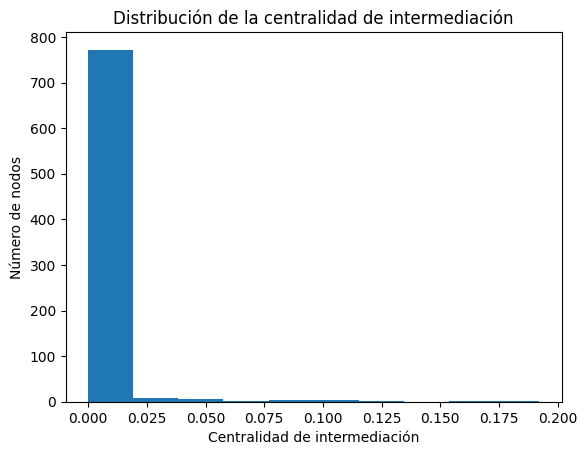


Top 10 personajes con mayor centralidad de cercanía:

Top   Nombre               Centralidad
1     Tyrion-Lannister     0.4763331336129419
2     Robert-Baratheon     0.4592720970537262
3     Eddard-Stark         0.455848623853211
4     Cersei-Lannister     0.45454545454545453
5     Jaime-Lannister      0.4519613416714042
6     Jon-Snow             0.44537815126050423
7     Stannis-Baratheon    0.4446308724832215
8     Robb-Stark           0.4441340782122905
9     Joffrey-Baratheon    0.4339519650655022
10    Catelyn-Stark        0.4334787350054526

Distribución de la centralidad de cercanía:


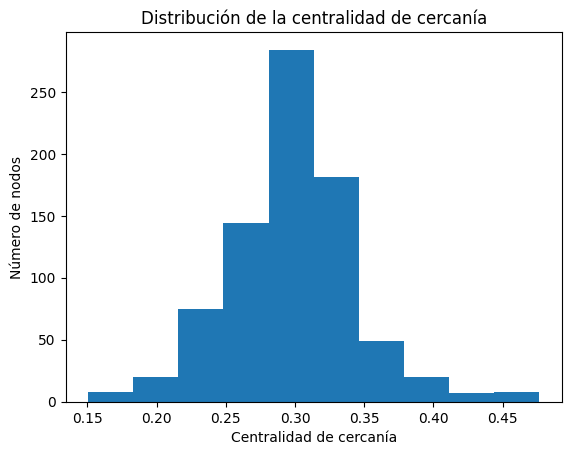


Top 10 personajes con mayor centralidad de Katz:

Top   Nombre               Centralidad
1     Stannis-Baratheon    0.30740819040547523
2     Davos-Seaworth       0.24818677977600312
3     Melisandre           0.14910295312922617
4     Selyse-Florent       0.14612811939391007
5     Cressen              0.13459126844647518
6     Shireen-Baratheon    0.12934585569936566
7     Axell-Florent        0.1251334775711204
8     Renly-Baratheon      0.12123110343879231
9     Alester-Florent      0.10804505893921336
10    Pylos                0.10227623725064909

Distribución de la centralidad de Katz:


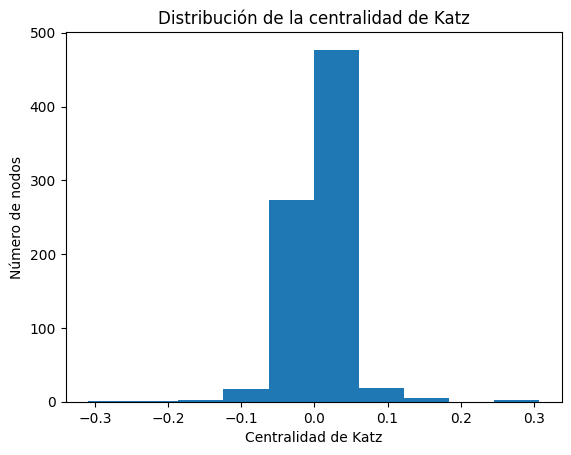


Top 10 personajes con mayor centralidad de PageRank:

Top   Nombre               Centralidad
1     Jon-Snow             0.03569376450045843
2     Tyrion-Lannister     0.03284906001585236
3     Cersei-Lannister     0.023607038592018487
4     Daenerys-Targaryen   0.022306881987248013
5     Jaime-Lannister      0.01975354961936214
6     Eddard-Stark         0.01893821958472186
7     Arya-Stark           0.018538944931775433
8     Stannis-Baratheon    0.01805167123106783
9     Joffrey-Baratheon    0.01742008392061762
10    Robb-Stark           0.01734465110466734

Distribución de la centralidad de PageRank:


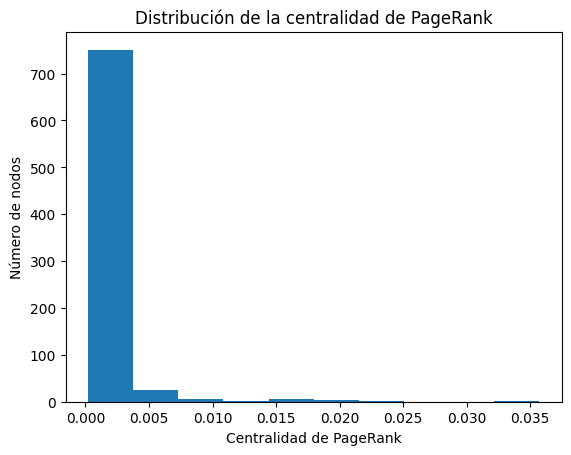

In [12]:
calcular_centralidades(G)

Analizando los resultados, encontramos:  
- En la **centralidad de grado**: el personaje más importante con esta medida es Tyrion Lannister, seguido de cerca por Jon Snow. Esto significa que son los que más interacciones tienen en toda la serie. Como podemos ver, los Lannister parecen los personajes más influyentes, seguidos por los Stark. Sorprende un poco que Eddard Stark esté en este top, ya que murió en la primera temporada, lo que quiere decir que fue un personaje muy influyente en el poco tiempo que tuvo.  

  En cuanto a la distribución, la mayoría de nodos (personajes) tienen entre 0 y 0.025 de centralidad, y unos pocos tienen alrededor de 0.05. A partir de ahí hay muy pocos nodos. Esto quiere decir que hay muchos personajes en la serie, pero con muy pocas interacciones, se podría decir "de relleno".

- En la **centralidad de vector propio**: el personaje más importante aquí vuelve a ser Tyrion Lannister. Significa que es el personaje que, aun teniendo muchas interacciones, estas son muy importantes, ya que está concectado a muchos personajes también importantes. Vemos algunos cambios con el top anterior: Jon Snow ya no aparece, lo cual significa que se relacionaba con mucha gente, pero gente que no es muy importante, por lo que pierde influencia. Eddard Stark ha subido puestos, lo cual tiene lógica, ya que era el Señor de Winterfell, y sus relaciones, además de ser numerosas, son con gente influyente. Vemos que los Lannister siguen siendo los personajes más importantes, seguidos por los Stark, y aparecen los Baratheon ya que, aunque no son los personajes más populares de la serie, vemos que se relacionan con los personajes importantes.  

  La distribución es muy parecida a la de la medida anterior, ya que hay un gran número de nodos con muy poca influencia (hasta 0.025, aproximadamente), y muy pocos que sean considerados importantes. Esto significa que la mayoría de las relaciones entre los personajes no tienen gran relevancia en la historia.

- En la **centralidad de intermediación**: vemos que el personaje con mayor centralidad es Jon Snow. Es el personaje que mejor sirve de puente entre otros personajes. Le sigue Tyrion Lannister, con algo menos de centralidad. El resto de personajes de este top tienen alrededor de la mitad o menos influencia que Jon Snow. Aparece por primera vez Daenerys Targaryen. Daenerys es el personaje más importante de Essos, por lo que la mayoría de interacciones entre Westeros y Essos han tenido que pasar a través de ella.  

  La distribución en este caso es más desigual que las anteriores, no llegando la gran mayoría de nodos al 0.025 de centralidad. No hay prácticamente intermediarios.

- En la **centralidad de cercanía**: el personaje más importante es Tyrion Lannister, estando en el top los Lannister, los Stark y los Baratheon, pero con unos valores muy similares. Significa que tienen una cercanía bastante alta al resto de personajes.  

  La gráfica en este caso sigue una distribución normal, como es de esperar con esta medida. Es decir, la mayoría de personajes pueden repartir información a otros personajes a una velocidad medianamente normal, y hay muy pocos personajes que pueden transmitir informaciones de una forma muy lenta o muy rápida.

- En la **centralidad de Katz**: aquí observamos que los personajes más importantes son Stannis Baratheon, Davos Seaworth o Melisandre. El resto de personajes de este top, en la serie, objetivamente, no tienen una gran influencia. Por tanto, esta medida no es útil para este grafo, ya que no da resultados realistas. Esta medida de centralidad funcionaría bien en grafos no dirigidos, pero a este grafo, al ser dirigido, se le puede aplicar directamente la medida de centralidad de vector propio, que es similar a la centralidad de Katz y funciona bien con este tipo de grafos.  
  
  En cuanto a la distribución, vemos que es normal alrededor de 0.

- En la **centralidad de PageRank**: utilizando esta última medida, los personajes más importantes son Jon Snow en primer lugar (~0.35) y Tyrion Lannister en segundo lugar (~0.33), con mucha diferencia con respecto a los siguientes (~0.23 para abajo). Aparece por segunda vez Daenerys Targaryen, y vuelven a estar en los primeros lugares Jaime y Cersei Lannister y un poco más abajo los Stark y los Baratheon.
  
  La distribución es muy parecida a la de vector propio, y los resultados son muy confiables, ya que son algoritmos que se parecen mucho.

#### Top 3 Personajes más Importantes y Análisis de las Mejores Medidas

### Tiempos de Cálculo